## Описание датасета

Датасет представляет собой результаты трех тестов (по математике, чтению и письму), проводимых в некоторой школе (ненастоящей!),  
а также набор личных и социально-экономических характеристик обучающихся, которые могут повлиять на результаты.

Характеристики обучающихся в датасете:  
1) пол,
2) этническая группа,
3) образование родителей(я),
4) тип обеда (платный - полный или бесплатный - уменьшенный),
5) прослушивал ли обучающий курс по подготовке к тесту,
6) семейное положение родителей(я),
7) частота занятий спортом,
8) является ли обучающий первым ребенком в семье,
9) количество братьев/сестер,
10) как обучающийся добирается до школы,
11) количество часов, затрачиваемых на самостоятельную подготовку (в неделю),
12) результат теста по математике,
13) результат теста по чтению,
14) результат теста по письму.

Попробуем оценить результат обучающегося на контрольных по его характеристикам.

## Подключение необходимых библиотек

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_absolute_error

## Чтение данных

In [2]:
data_path = 'data/Expanded_data_with_more_features.csv'
data_raw = pd.read_csv(data_path)

In [3]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [4]:
data_raw.describe(include='all')

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
count,30641.000000,30641,28801,28796,30641,28811,29451,30010,29737,29069.000000,27507,29686,30641.000000,30641.000000,30641.000000
unique,NaN,2,5,6,2,2,4,3,2,NaN,2,3,NaN,NaN,NaN
top,NaN,female,group C,some college,standard,none,married,sometimes,yes,NaN,school_bus,5 - 10,NaN,NaN,NaN
freq,NaN,15424,9212,6633,19905,18856,16844,15213,19082,NaN,16145,16246,NaN,NaN,NaN
mean,499.556607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.145894,NaN,NaN,66.558402,69.377533,68.418622
std,288.747894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.458242,NaN,NaN,15.361616,14.758952,15.443525
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,10.000000,4.000000
25%,249.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,56.000000,59.000000,58.000000
50%,500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,67.000000,70.000000,69.000000
75%,750.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,78.000000,80.000000,79.000000


Установим верные типы столбцов:

In [5]:
data = data_raw.drop(['Unnamed: 0'], axis=1)

type_mapping = {'Gender': 'category', 'EthnicGroup': 'category', 'ParentEduc': 'category', 'LunchType': 'category', 'TestPrep': 'category', 'ParentMaritalStatus': 'category', 'PracticeSport': 'category', 'IsFirstChild': 'category', 'NrSiblings': 'category', 'TransportMeans': 'category', 'WklyStudyHours': 'category', 'MathScore': int, 'ReadingScore': int, 'WritingScore': int}
data = data.astype(type_mapping)

Отобразим гистограммы результатов контрольных, графики их зависимости друг от друга и матрицу их корреляции:

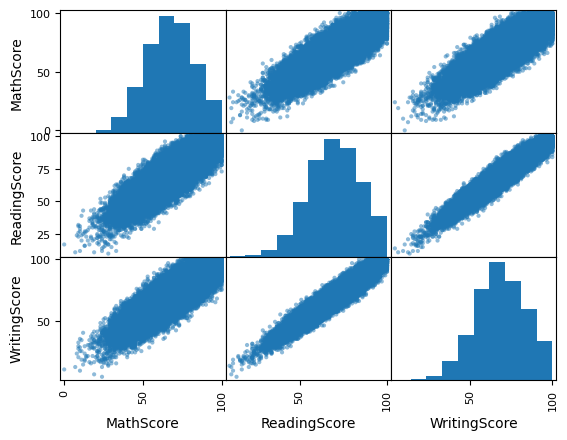

In [6]:
pd.plotting.scatter_matrix(data)
pass

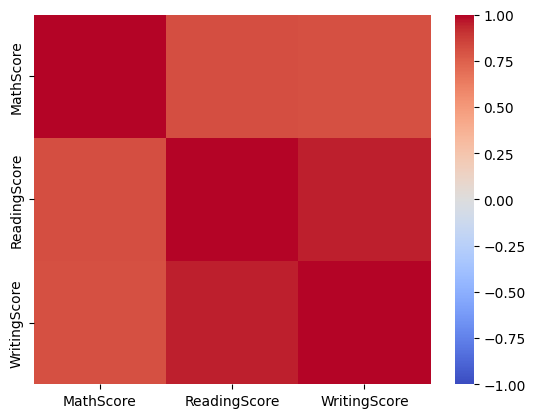

In [7]:
sns.heatmap(data[['MathScore', 'ReadingScore', 'WritingScore']].corr(), cmap='coolwarm', vmin=-1, vmax=1)
pass

Видно, что все результаты контрольных довольно сильно скоррелированы.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Gender               30641 non-null  category
 1   EthnicGroup          28801 non-null  category
 2   ParentEduc           28796 non-null  category
 3   LunchType            30641 non-null  category
 4   TestPrep             28811 non-null  category
 5   ParentMaritalStatus  29451 non-null  category
 6   PracticeSport        30010 non-null  category
 7   IsFirstChild         29737 non-null  category
 8   NrSiblings           29069 non-null  category
 9   TransportMeans       27507 non-null  category
 10  WklyStudyHours       29686 non-null  category
 11  MathScore            30641 non-null  int32   
 12  ReadingScore         30641 non-null  int32   
 13  WritingScore         30641 non-null  int32   
dtypes: category(11), int32(3)
memory usage: 690.2 KB


In [9]:
data.describe(include='all')

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
count,30641,28801,28796,30641,28811,29451,30010,29737,29069.0,27507,29686,30641.000000,30641.000000,30641.000000
unique,2,5,6,2,2,4,3,2,8.0,2,3,NaN,NaN,NaN
top,female,group C,some college,standard,none,married,sometimes,yes,1.0,school_bus,5 - 10,NaN,NaN,NaN
freq,15424,9212,6633,19905,18856,16844,15213,19082,8217.0,16145,16246,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.558402,69.377533,68.418622
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.361616,14.758952,15.443525
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,10.000000,4.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.000000,59.000000,58.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.000000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.000000,80.000000,79.000000


Теперь отобразим гистограммы результатов контрольных в зависимости от пола:

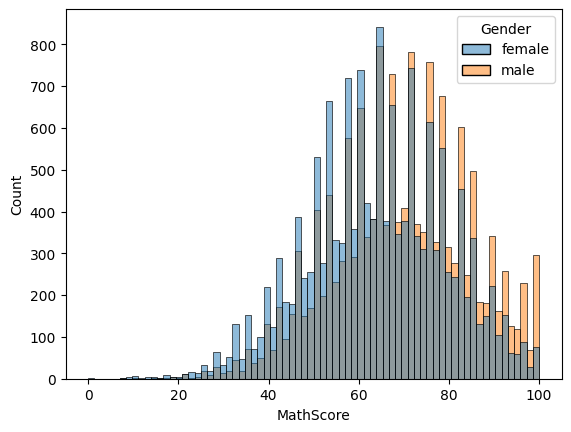

In [10]:
sns.histplot(data=data, x='MathScore', hue='Gender')
pass

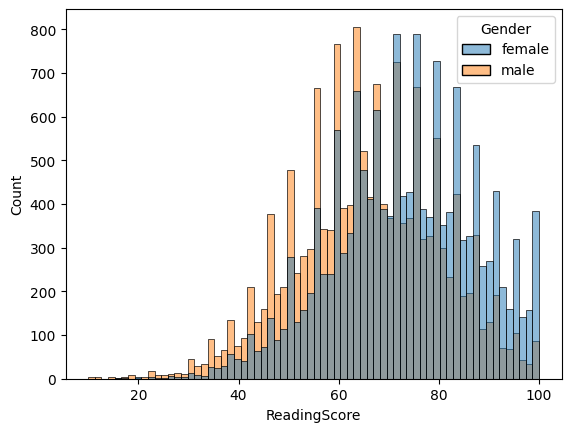

In [11]:
sns.histplot(data=data, x='ReadingScore', hue='Gender')
pass

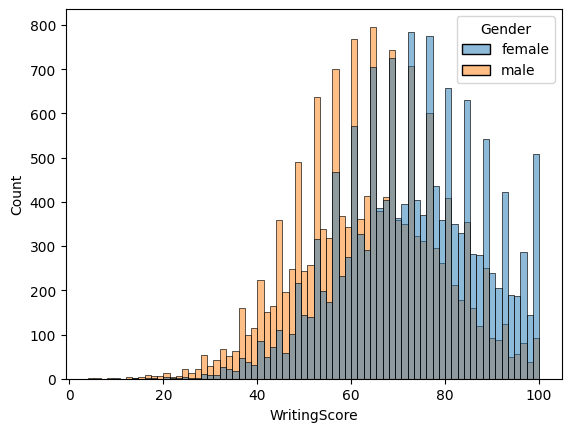

In [12]:
sns.histplot(data=data, x='WritingScore', hue='Gender')
pass

Заметно, что по математике в среднем результаты у обучающихся мужского пола выше, а по чтению и письму - наоборот.

## Обработка пропущенных значений

In [13]:
data.isna().sum()

Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

Для категориальных признаков заполним пропущенные значения модой:

In [14]:
for column in data.columns:
    if data[column].dtype == 'category':
        data[column].fillna(data[column].mode().iloc[0], inplace=True)
data['NrSiblings'] = data['NrSiblings'].astype(int)
data.describe(include='all')

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
count,30641,30641,30641,30641,30641,30641,30641,30641,30641.000000,30641,30641,30641.000000,30641.000000,30641.000000
unique,2,5,6,2,2,4,3,2,NaN,2,3,NaN,NaN,NaN
top,female,group C,some college,standard,none,married,sometimes,yes,NaN,school_bus,5 - 10,NaN,NaN,NaN
freq,15424,11052,8478,19905,20686,18034,15844,19986,NaN,19279,17201,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.087106,NaN,NaN,66.558402,69.377533,68.418622
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.442665,NaN,NaN,15.361616,14.758952,15.443525
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,10.000000,4.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,56.000000,59.000000,58.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,67.000000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,78.000000,80.000000,79.000000


## Обработка категориальных признаков

In [15]:
binary_columns = ['Gender', 'LunchType', 'TestPrep', 'IsFirstChild', 'TransportMeans']
for column in binary_columns:
    data[column] = pd.factorize(data[column])[0]

data

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,group C,bachelor's degree,0,0,married,regularly,0,3,0,< 5,71,71,74
1,0,group C,some college,0,0,married,sometimes,0,0,0,5 - 10,69,90,88
2,0,group B,master's degree,0,0,single,sometimes,0,4,0,< 5,87,93,91
3,1,group A,associate's degree,1,0,married,never,1,1,0,5 - 10,45,56,42
4,1,group C,some college,0,0,married,sometimes,0,0,0,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,0,group D,high school,0,0,single,sometimes,1,2,0,5 - 10,59,61,65
30637,1,group E,high school,0,0,single,regularly,1,1,1,5 - 10,58,53,51
30638,0,group C,high school,1,1,married,sometimes,1,1,1,5 - 10,61,70,67
30639,0,group D,associate's degree,0,1,married,regularly,1,3,0,5 - 10,82,90,93


In [16]:
category_columns = ['EthnicGroup', 'ParentEduc', 'ParentMaritalStatus', 'PracticeSport', 'WklyStudyHours']
for column in category_columns:
    dummies = pd.get_dummies(data[column], prefix=column, dtype=int)
    data = data.drop(column, axis=1)
    data = pd.concat((data, dummies), axis=1)

data

,Gender,LunchType,TestPrep,IsFirstChild,NrSiblings,TransportMeans,MathScore,ReadingScore,WritingScore,EthnicGroup_group A,...,ParentMaritalStatus_divorced,ParentMaritalStatus_married,ParentMaritalStatus_single,ParentMaritalStatus_widowed,PracticeSport_never,PracticeSport_regularly,PracticeSport_sometimes,WklyStudyHours_5 - 10,WklyStudyHours_< 5,WklyStudyHours_> 10
0,0,0,0,0,3,0,71,71,74,0,...,0,1,0,0,0,1,0,0,1,0
1,0,0,0,0,0,0,69,90,88,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,0,0,4,0,87,93,91,0,...,0,0,1,0,0,0,1,0,1,0
3,1,1,0,1,1,0,45,56,42,1,...,0,1,0,0,1,0,0,1,0,0
4,1,0,0,0,0,0,76,78,75,0,...,0,1,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,0,0,0,1,2,0,59,61,65,0,...,0,0,1,0,0,0,1,1,0,0
30637,1,0,0,1,1,1,58,53,51,0,...,0,0,1,0,0,1,0,1,0,0
30638,0,1,1,1,1,1,61,70,67,0,...,0,1,0,0,0,0,1,1,0,0
30639,0,0,1,1,3,0,82,90,93,0,...,0,1,0,0,0,1,0,1,0,0


## Нормализация

In [17]:
data_std = data.drop(['MathScore', 'ReadingScore', 'WritingScore'], axis=1)
data_std['NrSiblings'] = (data_std['NrSiblings'] - data_std['NrSiblings'].min(axis=0)) / (data_std['NrSiblings'].max(axis=0) - data_std['NrSiblings'].min(axis=0))
data_std.describe()

,Gender,LunchType,TestPrep,IsFirstChild,NrSiblings,TransportMeans,EthnicGroup_group A,EthnicGroup_group B,EthnicGroup_group C,EthnicGroup_group D,...,ParentMaritalStatus_divorced,ParentMaritalStatus_married,ParentMaritalStatus_single,ParentMaritalStatus_widowed,PracticeSport_never,PracticeSport_regularly,PracticeSport_sometimes,WklyStudyHours_5 - 10,WklyStudyHours_< 5,WklyStudyHours_> 10
count,30641.000000,30641.000000,30641.000000,30641.000000,30641.000000,30641.00000,30641.000000,30641.000000,30641.000000,30641.000000,...,30641.000000,30641.000000,30641.000000,30641.000000,30641.000000,30641.000000,30641.000000,30641.000000,30641.000000,30641.000000
mean,0.496622,0.350380,0.324891,0.347737,0.298158,0.37081,0.072419,0.190137,0.360693,0.244868,...,0.160537,0.588558,0.231618,0.019288,0.130675,0.352240,0.517085,0.561372,0.268855,0.169773
std,0.499997,0.477097,0.468342,0.476260,0.206095,0.48303,0.259185,0.392416,0.480209,0.430016,...,0.367109,0.492103,0.421873,0.137537,0.337050,0.477676,0.499716,0.496227,0.443372,0.375439
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.142857,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.285714,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,0.428571,1.00000,0.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
data_score = data[['MathScore', 'ReadingScore', 'WritingScore']] / 100
data_score.describe()

,MathScore,ReadingScore,WritingScore
count,30641.000000,30641.000000,30641.000000
mean,0.665584,0.693775,0.684186
std,0.153616,0.147590,0.154435
min,0.000000,0.100000,0.040000
25%,0.560000,0.590000,0.580000
50%,0.670000,0.700000,0.690000
75%,0.780000,0.800000,0.790000
max,1.000000,1.000000,1.000000


Проверим корреляцию между различными категориальными признаками:

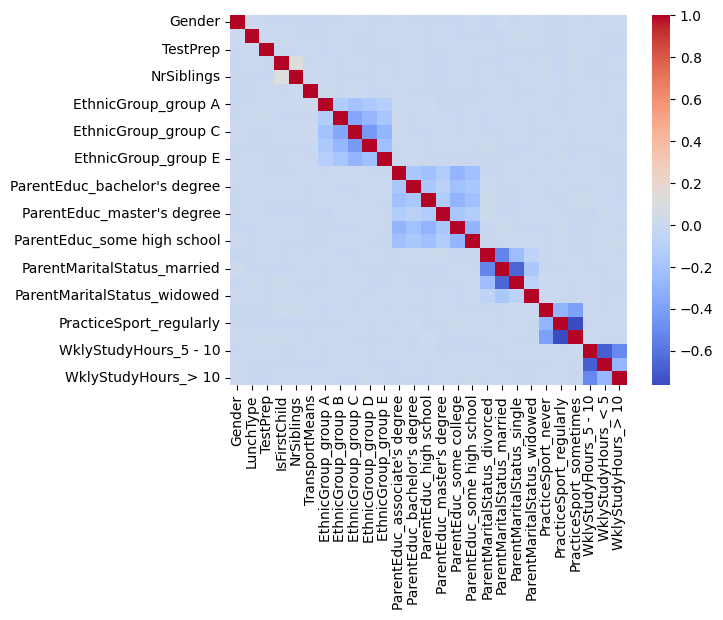

In [19]:
sns.heatmap(data_std.corr(), cmap='coolwarm')
pass

## Разбиение на тестовую и обучающую выборки

In [20]:
X = data_std
y = data_score

In [21]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
N_train, _ = X_train.shape
N_test, _ = X_test.shape

print(N_train, N_test)

26044 4597


## $k$ ближайших соседей

In [22]:
from sklearn.neighbors import KNeighborsRegressor


knn = KNeighborsRegressor().fit(X_train, y_train)

y_train_predict = pd.DataFrame(knn.predict(X_train), columns=['MathScore predicted', 'ReadingScore predicted', 'WritingScore predicted'])
y_test_predict = pd.DataFrame(knn.predict(X_test), columns=['MathScore predicted', 'ReadingScore predicted', 'WritingScore predicted'])

mean_train = mean_absolute_error(y_train, y_train_predict, multioutput='raw_values')
mean_test = mean_absolute_error(y_test, y_test_predict, multioutput='raw_values')

print('Mean absolute error:', mean_train, mean_test)

Mean absolute error: [0.0945612  0.09477599 0.09310966] [0.1140496  0.11410616 0.11286665]


Отобразим графики ядерной оценки плотностей распределения для полученных результатов регрессионной модели.

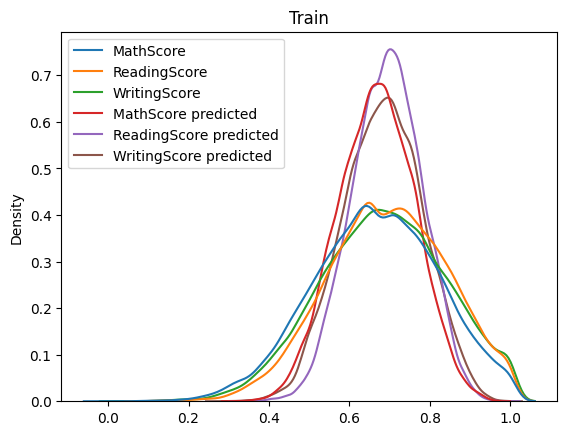

In [23]:
sns.kdeplot(pd.concat([y_train, y_train_predict], axis=1)).set(title='Train')
pass

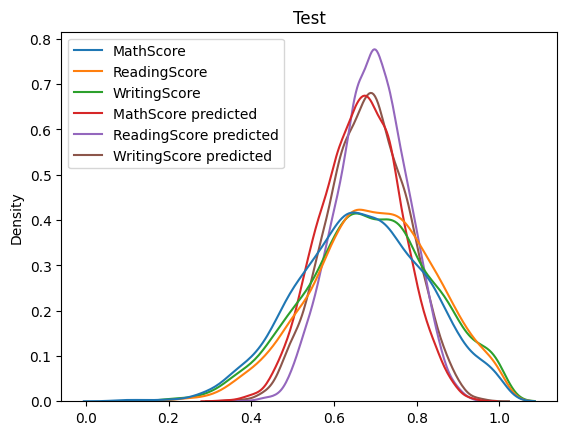

In [24]:
sns.kdeplot(pd.concat([y_test, y_test_predict], axis=1)).set(title='Test')
pass

Подберем лучший параметр `n_neighbors`.

In [25]:
from sklearn.model_selection import GridSearchCV


nnb = [_ for _ in range(2, 201, 2)]
grid = GridSearchCV(KNeighborsRegressor(), param_grid={'n_neighbors': nnb}, n_jobs=-1, scoring='neg_mean_squared_error').fit(X_train, y_train)

print('Best n_neighbors:', grid.best_estimator_.n_neighbors)

Best n_neighbors: 48


In [26]:
knn = grid.best_estimator_

y_train_predict = pd.DataFrame(knn.predict(X_train), columns=['MathScore predicted', 'ReadingScore predicted', 'WritingScore predicted'])
y_test_predict = pd.DataFrame(knn.predict(X_test), columns=['MathScore predicted', 'ReadingScore predicted', 'WritingScore predicted'])

mean_train = mean_absolute_error(y_train, y_train_predict, multioutput='raw_values')
mean_test = mean_absolute_error(y_test, y_test_predict, multioutput='raw_values')

print('Mean absolute error:', mean_train, mean_test)

Mean absolute error: [0.10667427 0.10650423 0.10533697] [0.10686068 0.1077266  0.10627438]


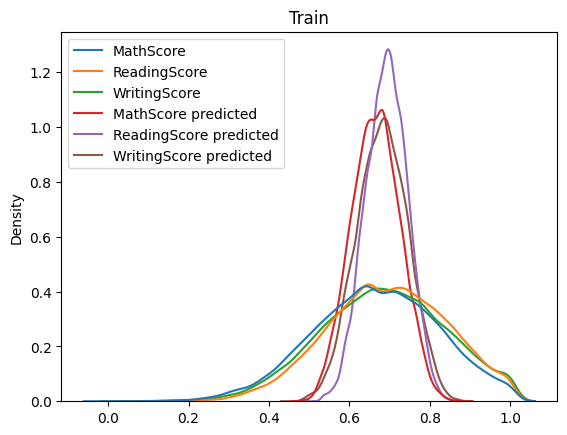

In [27]:
sns.kdeplot(pd.concat([y_train, y_train_predict], axis=1)).set(title='Train')
pass

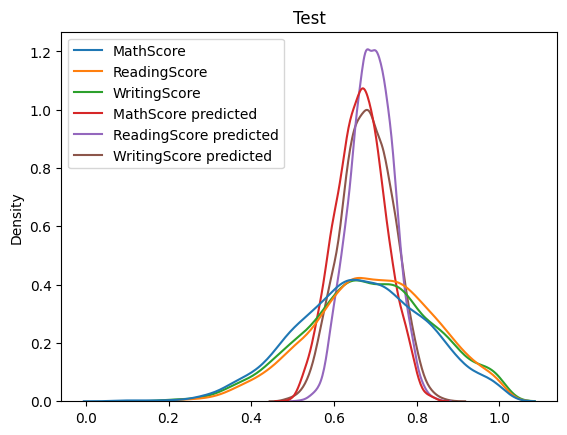

In [28]:
sns.kdeplot(pd.concat([y_test, y_test_predict], axis=1)).set(title='Test')
pass

Из графиков и полученных значений ошибки видно, что не удается построить достаточно реалистичную модель регрессии, основанную на заданных признаках,  
так как полученное среднее значение ошибки составляет примерно $0.11$ при области значений $[0, 1]$.  
Проверим работу регрессионной модели для нескольких случайно выбранных элементов.

In [29]:
import random


print('Train examples')
for i in random.sample(range(N_train), 3):
    print(y_train.iloc[[i]].to_numpy(), knn.predict(X_train.iloc[[i]]))

print('Test examples')
for i in random.sample(range(N_test), 3):
    print(y_test.iloc[[i]].to_numpy(), knn.predict(X_test.iloc[[i]]))

Train examples
[[0.67 0.75 0.81]] [[0.64     0.71     0.714375]]
[[0.55 0.48 0.48]] [[0.67291667 0.68833333 0.65458333]]
[[0.57 0.85 0.83]] [[0.58375    0.69166667 0.69604167]]
Test examples
[[0.59 0.65 0.56]] [[0.70145833 0.68854167 0.66041667]]
[[0.5  0.49 0.43]] [[0.69041667 0.66333333 0.63520833]]
[[0.72 0.63 0.68]] [[0.79770833 0.74645833 0.76625   ]]


Видно, что есть как близко (почти совпадающие), так и далеко (отличающиеся примерно на $0.2$) лежащие значения.

## Случайный лес

In [30]:
from sklearn.ensemble import RandomForestRegressor


rf = RandomForestRegressor().fit(X_train, y_train)

y_train_predict = rf.predict(X_train)
y_test_predict = rf.predict(X_test)

mean_train = mean_absolute_error(y_train, y_train_predict, multioutput='raw_values')
mean_test = mean_absolute_error(y_test, y_test_predict, multioutput='raw_values')

print('Mean absolute error:', mean_train, mean_test)

Mean absolute error: [0.05856547 0.05854709 0.05714736] [0.11486034 0.11665073 0.11395471]


Выведем посчитанные значимости признаков.

In [31]:
rf_importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
rf_importances

NrSiblings                       0.164031
LunchType                        0.105056
Gender                           0.063217
TransportMeans                   0.062703
IsFirstChild                     0.058574
TestPrep                         0.052533
ParentMaritalStatus_married      0.035672
ParentMaritalStatus_single       0.032086
EthnicGroup_group E              0.031849
PracticeSport_sometimes          0.031699
PracticeSport_regularly          0.031643
WklyStudyHours_5 - 10            0.031610
ParentMaritalStatus_divorced     0.029192
WklyStudyHours_< 5               0.029064
WklyStudyHours_> 10              0.026753
EthnicGroup_group C              0.023047
PracticeSport_never              0.022832
ParentEduc_some high school      0.022788
EthnicGroup_group B              0.020934
EthnicGroup_group D              0.019989
ParentEduc_some college          0.018107
ParentEduc_high school           0.016684
ParentEduc_master's degree       0.016073
ParentEduc_associate's degree    0

## Линейная регрессия

In [32]:
from sklearn.linear_model import LinearRegression


linear = LinearRegression().fit(X_train, y_train)

y_train_predict = linear.predict(X_train)
y_test_predict = linear.predict(X_test)

mean_train = mean_absolute_error(y_train, y_train_predict, multioutput='raw_values')
mean_test = mean_absolute_error(y_test, y_test_predict, multioutput='raw_values')

print('Mean absolute error:', mean_train, mean_test)

Mean absolute error: [0.10494544 0.10509911 0.10279998] [0.10290581 0.10440464 0.10144455]


## Стохастический градиентный спуск

In [33]:
from sklearn.linear_model import SGDRegressor


sgd = SGDRegressor().fit(X_train, y_train['MathScore'])

y_train_predict = sgd.predict(X_train)
y_test_predict = sgd.predict(X_test)

mean_train = mean_absolute_error(y_train['MathScore'], y_train_predict)
mean_test = mean_absolute_error(y_test['MathScore'], y_test_predict)

print('Mean absolute error:', mean_train, mean_test)

Mean absolute error: 0.10501657519092655 0.10309612840607109


In [34]:
sgd = SGDRegressor().fit(X_train, y_train['ReadingScore'])

y_train_predict = sgd.predict(X_train)
y_test_predict = sgd.predict(X_test)

mean_train = mean_absolute_error(y_train['ReadingScore'], y_train_predict)
mean_test = mean_absolute_error(y_test['ReadingScore'], y_test_predict)

print('Mean absolute error:', mean_train, mean_test)

Mean absolute error: 0.10511273881609784 0.10443192675385544


In [35]:
sgd = SGDRegressor().fit(X_train, y_train['WritingScore'])

y_train_predict = sgd.predict(X_train)
y_test_predict = sgd.predict(X_test)

mean_train = mean_absolute_error(y_train['WritingScore'], y_train_predict)
mean_test = mean_absolute_error(y_test['WritingScore'], y_test_predict)

print('Mean absolute error:', mean_train, mean_test)

Mean absolute error: 0.10300046241299016 0.1018077282778397


## MLPRegressor

In [36]:
from sklearn.neural_network import MLPRegressor


mlp = MLPRegressor(max_iter=1000).fit(X_train, y_train)

y_train_predict = mlp.predict(X_train)
y_test_predict = mlp.predict(X_test)

mean_train = mean_absolute_error(y_train, y_train_predict, multioutput='raw_values')
mean_test = mean_absolute_error(y_test, y_test_predict, multioutput='raw_values')

print('Mean absolute error:', mean_train, mean_test)

Mean absolute error: [0.10509434 0.10511462 0.10277392] [0.10440142 0.1054707  0.10274624]


In [37]:
alphas = np.logspace(-6, 1, 50, dtype=np.double)

train_errors = []
test_errors = []

for alpha in alphas:
    mlp = MLPRegressor(alpha=alpha, max_iter=1000).fit(X_train, y_train)
    y_train_predict = mlp.predict(X_train)
    train_errors.extend(mean_absolute_error(y_train, y_train_predict, multioutput='raw_values'))
    y_test_predict = mlp.predict(X_test)
    test_errors.extend(mean_absolute_error(y_test, y_test_predict, multioutput='raw_values'))

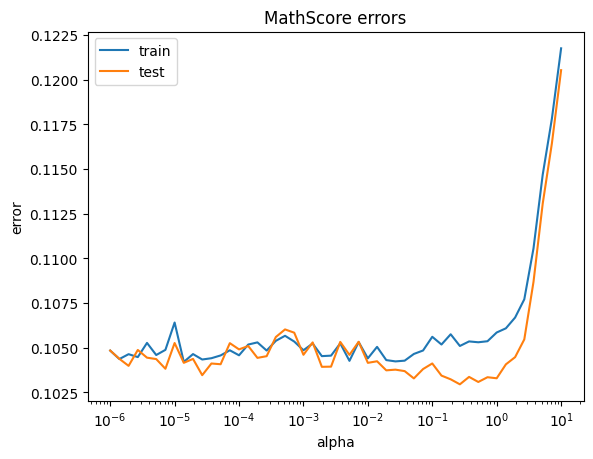

In [38]:
plt.plot(alphas, train_errors[0::3], label='train')
plt.plot(alphas, test_errors[0::3], label='test')
plt.title('MathScore errors')
plt.xlabel('alpha')
plt.ylabel('error')
plt.xscale('log')
plt.legend()
plt.show()
pass

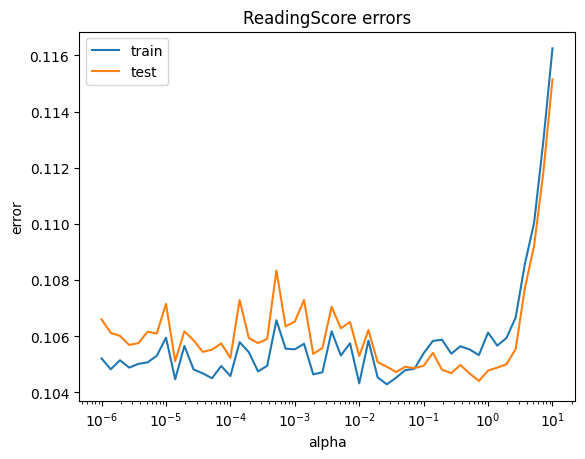

In [39]:
plt.plot(alphas, train_errors[1::3], label='train')
plt.plot(alphas, test_errors[1::3], label='test')
plt.title('ReadingScore errors')
plt.xlabel('alpha')
plt.ylabel('error')
plt.xscale('log')
plt.legend()
plt.show()
pass

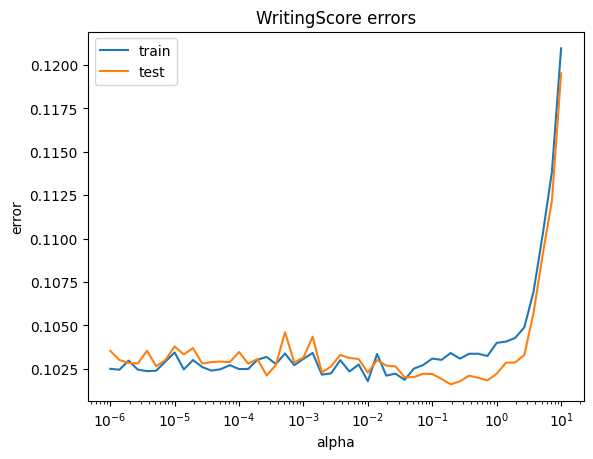

In [40]:
plt.plot(alphas, train_errors[2::3], label='train')
plt.plot(alphas, test_errors[2::3], label='test')
plt.title('WritingScore errors')
plt.xlabel('alpha')
plt.ylabel('error')
plt.xscale('log')
plt.legend()
plt.show()
pass

## Выводы

Были проверены различные регрессионные модели: `KNeighborsRegressor`, `RandomForestRegressor`, `LinearRegression`, `SGDRegressor`, `MLPRegressor`.  
При использовании случайного леса была получена минимальная ошибка на обучающей выборке.  
Однако на тестовой выборке у этой модели ошибка больше, чем у других, что говорит о переобучении.   
Ошибка на тестовой выборке совпадает почти у всех моделей и равна примерно `0.1`.